## Naive Text Disagreement Detection Function

In [ ]:
import json
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
%matplotlib inline

In [ ]:
def get_words_from_file(file_name):
      # Opening JSON file
      f = open(file_name)
   
      # returns JSON object as a dictionary
      data = json.load(f)
      f.close()
    
      # extract all the words from the .json file
      words_data = data['results'][-1]['alternatives'][0]['words']

      return words_data

In [ ]:
def get_audio_from_file(file_name):
    y, sr = librosa.load(file_name)
    return y, sr

In [ ]:
# use the above functions on the dog clip
dog_text = '6hoNS9LR1Lxb4EzMX72kXR.json'

words_data_whole_episode = get_words_from_file(dog_text)

# had to cut the script since the audio only has the last 10 minutes
clip_start_idx = next((idx for (idx, d) in enumerate(words_data_whole_episode) if (d["startTime"] == "2400.500s")), None)
sub_episode_txt = words_data_whole_episode[clip_start_idx:]

# had to re-index the start and end time for each word to pass into the function
for i in range(len(sub_episode_txt)):
    start = float(sub_episode_txt[i]['startTime'][:-1]) - 2400
    end = float(sub_episode_txt[i]['endTime'][:-1]) - 2400
    start_str = str(start) + 's'
    end_str = str(end) + 's'
    sub_episode_txt[i]['startTime'] = start_str
    sub_episode_txt[i]['endTime'] = end_str

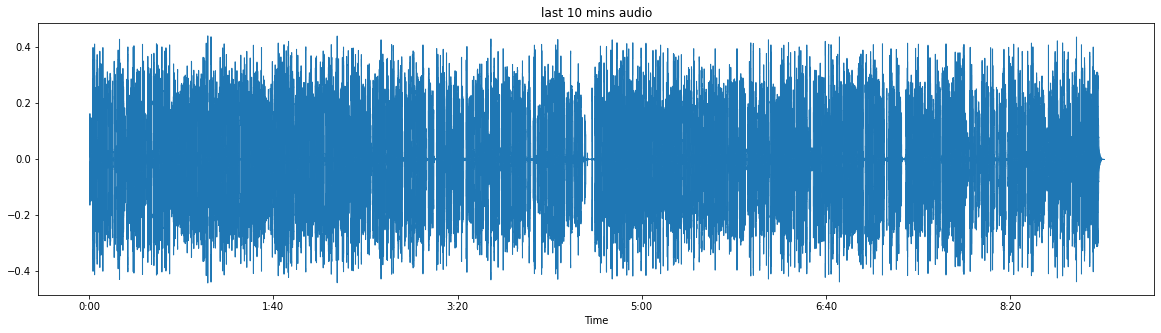

In [ ]:
# load and cut audio data
dog_audio = '6hoNS9LR1Lxb4EzMX72kXR.ogg'
y, sr = get_audio_from_file(dog_audio)

# get the last 10 minutes audio
first_40mins = librosa.time_to_samples(60*40, sr=sr)
sub_episode = y[first_40mins:]

plt.figure(figsize = (20,5))
plt.title('last 10 mins audio')
librosa.display.waveshow(sub_episode, sr=sr)
plt.show()

### segment by words

In [ ]:
# segment by words function
def segment_by_words(words_data, audio_data):
    audio_word_seg = []
    for i in range(len(words_data)):
        start = float(words_data[i]['startTime'][:-1])
        end = float(words_data[i]['endTime'][:-1])
        start_sr = librosa.time_to_samples(start, sr=sr)
        end_sr = librosa.time_to_samples(end, sr=sr)
        sub_audio = audio_data[start_sr:end_sr + 1]
        audio_word_seg.append(sub_audio)
    return words_data, audio_word_seg

In [ ]:
words_data, audio_word_seg = segment_by_words(sub_episode_txt, sub_episode)

In [ ]:
print(len(audio_word_seg))
print(len(sub_episode_txt))
print(audio_word_seg[0])
print(len(audio_word_seg[0])/sr)
print(sub_episode_txt[0])

1560
1560
[ 3.0113605e-04 -8.6944063e-05 -4.9231545e-04 ... -5.2568328e-04
 -1.3311985e-03 -7.0039718e-04]
0.7
{'startTime': '0.5s', 'endTime': '1.199999999999818s', 'word': 'Unfortunately.', 'speakerTag': 1}


In [ ]:
print(audio_word_seg[0])

[ 3.0113605e-04 -8.6944063e-05 -4.9231545e-04 ... -5.2568328e-04
 -1.3311985e-03 -7.0039718e-04]


### segment by seconds

In [ ]:
# segment by time
def segment_by_time(words_data, audio_data, seg_length):
    clip_start_time = float(words_data[0]['startTime'][:-1])
    clip_end_time = float(words_data[-1]['endTime'][:-1])

    segments = np.arange(clip_start_time, clip_end_time, seg_length)
    audio_time_seg = []
    text_time_seg = []
    for i in range(len(segments) - 1):
        start = segments[i]
        end = segments[i + 1]

        # audio segments
        start_sr = librosa.time_to_samples(start, sr=sr)
        end_sr = librosa.time_to_samples(end, sr=sr)
        sub_audio = audio_data[start_sr:end_sr + 1]
        audio_time_seg.append(sub_audio)

        # text segments
        sub_text = []
        for j in range(len(words_data)):
            current_word = words_data[j]
            current_word_start = float(current_word['startTime'][:-1])
            current_word_end = float(current_word['endTime'][:-1])
            if current_word_start >= start and current_word_end <= end:
                sub_text.append(current_word)

            # to save time
            elif current_word_end > end:
                break
            
        text_time_seg.append(sub_text)
    return text_time_seg, audio_time_seg

In [ ]:
seg_length = 10
text_time_seg, audio_time_seg = segment_by_time(sub_episode_txt, sub_episode, seg_length)


In [ ]:
# print(len(segments))
print(len(text_time_seg))
print(len(audio_time_seg))
print(text_time_seg[0])
print(len(audio_time_seg[0])/sr)

54
54
[{'startTime': '0.5s', 'endTime': '1.199999999999818s', 'word': 'Unfortunately.', 'speakerTag': 1}, {'startTime': '1.599999999999909s', 'endTime': '2.0s', 'word': 'Yeah,', 'speakerTag': 3}, {'startTime': '2.099999999999909s', 'endTime': '2.199999999999818s', 'word': "we're", 'speakerTag': 3}, {'startTime': '2.199999999999818s', 'endTime': '2.5s', 'word': 'gonna', 'speakerTag': 3}, {'startTime': '2.5s', 'endTime': '3.099999999999909s', 'word': 'die', 'speakerTag': 3}, {'startTime': '3.199999999999818s', 'endTime': '3.699999999999818s', 'word': 'together', 'speakerTag': 3}, {'startTime': '3.699999999999818s', 'endTime': '3.900000000000091s', 'word': 'and', 'speakerTag': 3}, {'startTime': '3.900000000000091s', 'endTime': '4.5s', 'word': 'alone.', 'speakerTag': 3}, {'startTime': '5.800000000000182s', 'endTime': '6.400000000000091s', 'word': 'Yes,', 'speakerTag': 1}, {'startTime': '7.099999999999909s', 'endTime': '7.199999999999818s', 'word': 'I', 'speakerTag': 1}, {'startTime': '7.19